Build a regression model.

In [84]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# loading data
df = pd.read_csv('../data/final_df.csv')
df.head()

,name,popularity,price,rating,distance,latitude,longitude,stationId,totalBikes,poiCat
0,Inn,9.67,2.0,NaN,36.0,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2.0,restaurant
1,Roy's Soul Food,8.93,1.0,NaN,45.0,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2.0,restaurant
2,Sammy Submarine,NaN,NaN,NaN,69.0,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2.0,restaurant
3,Sunny Submarine,9.97,1.0,NaN,70.0,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2.0,restaurant
4,Gold Post Lounge,NaN,NaN,NaN,180.0,41.765862,-87.614787,0503ab6ec0734343264ef6f2e972c32b,2.0,restaurant


In [169]:
# have to drop NaNs for the model to work
df_model = df.dropna(subset=['price','rating','totalBikes','distance'])

In [159]:
df_model.corr()

,popularity,price,rating,distance,latitude,longitude,totalBikes
popularity,1.000000,0.137125,0.167007,-0.148624,-0.037817,0.086362,0.023276
price,0.137125,1.000000,0.219444,-0.150228,0.100488,0.114223,0.187295
rating,0.167007,0.219444,1.000000,-0.117683,0.218144,0.010445,0.206146
distance,-0.148624,-0.150228,-0.117683,1.000000,-0.108826,-0.049066,-0.147813
latitude,-0.037817,0.100488,0.218144,-0.108826,1.000000,-0.402452,0.364021
longitude,0.086362,0.114223,0.010445,-0.049066,-0.402452,1.000000,0.262219
totalBikes,0.023276,0.187295,0.206146,-0.147813,0.364021,0.262219,1.000000


In [172]:
# total bikes has the most correlation with price, rating, and distance

In [175]:
# want to look at how totalBikes at nearby stations affects the prices/ratings of nearby POIs
X = df_model[['price', 'rating','distance']]
y = df_model['totalBikes']
# adding a constant for an intercept
X = sm.add_constant(X)
X.head()

,const,price,rating,distance
8,1.0,2.0,63.0,607.0
15,1.0,1.0,70.0,621.0
18,1.0,1.0,50.0,677.0
22,1.0,1.0,54.0,403.0
27,1.0,1.0,82.0,510.0


Provide model output and an interpretation of the results. 

In [176]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             totalBikes   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.70e-124
Time:                        14:51:00   Log-Likelihood:                -25356.
No. Observations:                7384   AIC:                         5.072e+04
Df Residuals:                    7380   BIC:                         5.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7439      0.469      7.977      0.0

## Interpretation of Results
- **Adj. R-Squared**
    - 0.075
    - Close to 1, indicating an ok fit
- **Prob (F-Statistic)**
    - 1.70e-124
    - Very low p-value, the total bikes per station does have an effect on the price, rating, and distance of nearby POIs
- **P>|t|**
    - 0 for dependent variables
    - P-value is below 0.05, showing that it is relevent 
- **coef**
    - m = 1.7017 (price) 
        - price has the highest impact
    - m = 1.7017 (rating)
    - m = -0.0030 (distance
    - y = 3.7439
- **Prob(Omnibus) and Prob(JB**
    - values are both below 0.5, which means they most likely not normally distributed
    
Based on this, we can conclude that these dependent variables are related to our independent variable

In [173]:
# for the sake of being thorough, am running the model without distance as it appears to have the lowest correlation
X = df_model[['price', 'rating']]
y = df_model['totalBikes']
# adding a constant for an intercept
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             totalBikes   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     251.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.25e-106
Time:                        14:50:01   Log-Likelihood:                -25401.
No. Observations:                7384   AIC:                         5.081e+04
Df Residuals:                    7381   BIC:                         5.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9318      0.432      4.476      0.0

In [174]:
# this actually lowered the adj. r-squared, so i'll be adding distance back in

In [177]:
### Checking Residuals
residuals = results.resid
residuals

8        -8.491051
15       -1.319253
18        0.479283
22        6.340755
27        4.372246
           ...    
16126    16.154819
16127    19.236403
16128    -1.208508
16129     1.987989
16130    -0.460877
Length: 7384, dtype: float64

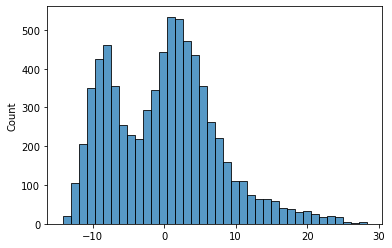

In [178]:
## Checking normality
sns.histplot(residuals)
plt.show()

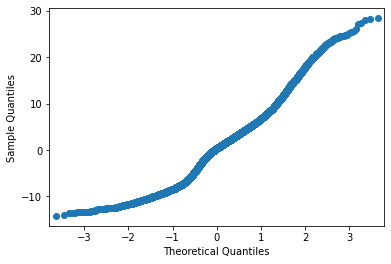

In [179]:
sm.qqplot(residuals)
plt.show()

In [ ]:
# there is some normality to the data, but definitely some skew and abnormality present

In [210]:
# Checking homoscedasticity

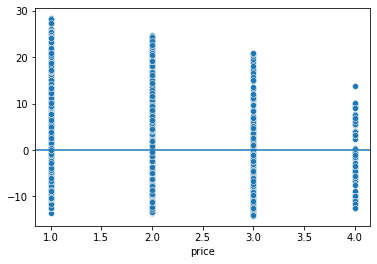

In [197]:
ax1 = sns.scatterplot(x=df_model['price'], y=residuals)
ax1.axhline(0) #horizontal line at 0

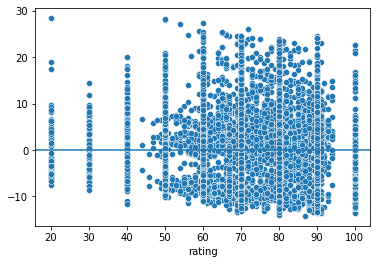

In [187]:
ax2 = sns.scatterplot(x=df_model['rating'], y=residuals)
ax2.axhline(0) #horizontal line at 0

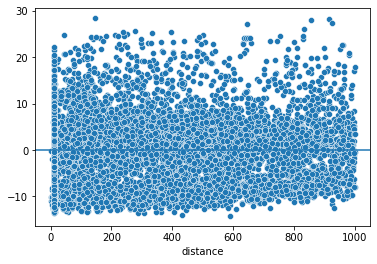

In [188]:
ax3 = sns.scatterplot(x=df_model['distance'], y=residuals)
ax3.axhline(0) #horizontal line at 0

In [189]:
stats.shapiro(residuals)

C:\Users\annie\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9685988426208496, pvalue=2.573853675696091e-37)

In [ ]:
# our data definitely is not normal

## Conclusion
- A good deal of my data was ordinal (i.e. price and rating were on a scale), which made a linear regression difficult
- This caused a lack of homoscedasticity and normality
- However, I believe that some correlations can still be found
- The number of bikes per station, clearly has a relationship with the price, rating, and distance from, nearby POIs
- One hypothesis, is that a station with a large amount of bikes, means that there are more potential customers in the area
    - With more potential customers, you have more opportunities to build your client base
    - Since bike stations are a static location, you will frequently have the same people using them
    - Regular customers tend to spend more money (making it easier for a business owner to raise prices), and be happier with their service
    - Therefore, if you have a business near a bike share station with a larger amount of total bikes, you could expect to see that reflected in your business

# Stretch

How can you turn the regression model into a classification model?